Linear Regression

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [75]:
Offense = pd.read_csv('Offense/clean_offense.csv')
Offense = Offense.replace(np.nan, 0)
Offense.head()

,Rk,Year,Player,Pos,AV,School,College,Height,Wt,40YD,Vertical,BenchReps,Broad Jump,3Cone,Shuttle,Drafted,Round
0,1,2000,Bashir Yamini,WR,0.0,Iowa,College Stats,75.0,191,4.53,33.0,0.0,130.0,7.09,4.18,0,0.0
1,2,2000,Spergon Wynn,QB,2.0,Texas State,College Stats,75.0,229,4.91,34.0,0.0,108.0,7.71,4.59,Cleveland Browns,6.0
2,3,2000,James Williams,WR,4.0,Marshall,College Stats,71.0,180,4.59,36.0,0.0,123.0,7.22,4.16,Seattle Seahawks,6.0
3,4,2000,Bobbie Williams,OT,64.0,Arkansas,0,76.0,332,5.26,29.0,28.0,97.0,7.78,4.72,Philadelphia Eagles,2.0
4,5,2000,Michael Wiley,RB,4.0,Ohio State,College Stats,71.0,193,4.50,0.0,0.0,0.0,0.00,0.00,Dallas Cowboys,5.0


In [76]:
OT = Offense[Offense['Pos'] == "OT"]
OT.head()

,Rk,Year,Player,Pos,AV,School,College,Height,Wt,40YD,Vertical,BenchReps,Broad Jump,3Cone,Shuttle,Drafted,Round
3,4,2000,Bobbie Williams,OT,64.0,Arkansas,0,76.0,332,5.26,29.0,28.0,97.0,7.78,4.72,Philadelphia Eagles,2.0
10,11,2000,Todd Wade,OT,51.0,Mississippi,0,80.0,326,5.22,27.5,29.0,101.0,7.68,4.68,Miami Dolphins,2.0
11,12,2000,Michael Thompson,OT,3.0,Tennessee State,0,76.0,305,5.28,26.0,16.0,104.0,7.99,4.73,Atlanta Falcons,4.0
21,22,2000,Marvel Smith,OT,57.0,Arizona State,0,77.0,320,5.37,27.5,24.0,100.0,7.87,4.83,Pittsburgh Steelers,2.0
22,23,2000,Wes Shivers,OT,0.0,Mississippi State,0,77.0,318,5.65,22.5,18.0,98.0,8.48,4.81,Tennessee Titans,7.0


In [77]:
X = OT[["Height", "Wt", "BenchReps", "Broad Jump", "3Cone",]]
y = OT["Round"].values.reshape(-1, 1)
print(X.shape, y.shape)

(437, 5) (437, 1)


In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [79]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [80]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.03848682029340322
Testing Score: -0.04572412975270845


Text(0.5, 1.0, 'Residual Plot')

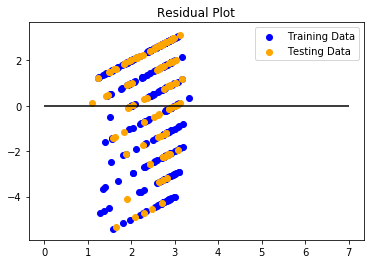

In [81]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

Quantifying Regression

In [82]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

In [83]:
model = LinearRegression()

In [84]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [85]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 5.420475184499509
R-squared (R2 ): 0.03178603316289497


In [86]:
model.score(X, y)

0.03178603316289497

In [87]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [88]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [89]:
model.score(X_test, y_test)

-0.04572412975270845

Logical Regression


In [91]:
XOffense = OT.drop(columns=["Rk","Year","Player","Pos","AV","School","College","Drafted", "40YD", "Vertical", "Shuttle"])

In [92]:
X = XOffense
y = OT["Round"]
print(X.shape, y.shape)

(437, 6) (437,)


In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [94]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [95]:
classifier.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [96]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.7308868501529052
Testing Data Score: 0.6909090909090909


In [97]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [1. 0. 0. 3. 5. 0. 2. 0. 0. 0.]
First 10 Actual labels: [3.0, 0.0, 0.0, 2.0, 5.0, 0.0, 2.0, 0.0, 0.0, 0.0]


In [98]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,1.0,3.0
1,0.0,0.0
2,0.0,0.0
3,3.0,2.0
4,5.0,5.0
5,0.0,0.0
6,2.0,2.0
7,0.0,0.0
8,0.0,0.0
9,0.0,0.0
